## Exploración de Datos


In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('Generacion.csv')


## NOTAS:
- Tenemos datos desde el 2013-01-01 hasta el 2024-10-13
- Las columnas GeneracionProgramadaDespacho y GeneracionProgramadaRedespacho, son iguales.
- El porcentaje real estimado tiene una eficacia del 30.70 %
- el porcentaje de generación se da : 
TipoGeneracion
    1. Hidraulica     59.959933
    2. Termica        23.423277
    3. Solar          10.269044
    4. Cogenerador     5.729065 
    5. Eolica          0.618680
- Hay 489 plantas funcionando.
- El despacho generado es en Kw

## 1. Estandatización de datos


In [39]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
display(df['Fecha'].dt.day.value_counts().sort_index())

Fecha
1     35997
2     36006
3     36013
4     36027
5     36023
6     36030
7     36038
8     36044
9     36056
10    36068
11    36076
12    36087
13    36088
14    35671
15    35676
16    35686
17    35691
18    35703
19    35712
20    35715
21    35730
22    35731
23    35748
24    35758
25    35764
26    35773
27    35777
28    35795
29    33554
30    32840
31    20803
Name: count, dtype: int64

In [19]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091680 entries, 0 to 1091679
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Fecha                           1091680 non-null  datetime64[ns]
 1   CodigoPlanta                    1091679 non-null  object        
 2   TipoGeneracion                  1091679 non-null  object        
 3   TipoClasificacion               1091679 non-null  object        
 4   TipoDespachoRecurso             1091679 non-null  object        
 5   GeneracionRealEstimada          1091680 non-null  float64       
 6   GeneracionProgramadaDespacho    1091680 non-null  float64       
 7   GeneracionProgramadaRedespacho  1091680 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 66.6+ MB


None

In [128]:
# Procentaje de igualdad
porcentaje_de_igualdad = (df['GeneracionProgramadaDespacho'] == df['GeneracionProgramadaRedespacho']).mean()*100

print(f"Porcentaje de valores iguales: {porcentaje_de_igualdad:.2f}%")

Porcentaje de valores iguales: 83.56%


In [ ]:
# Porcentaje de generacion
df['TipoGeneracion'].value_counts(normalize=True)*100

TipoGeneracion
Hidraulica     59.959933
Termica        23.423277
Solar          10.269044
Cogenerador     5.729065
Eolica          0.618680
Name: proportion, dtype: float64

In [40]:
display(df['CodigoPlanta'].value_counts().head(40))

CodigoPlanta
CIP1    4669
MIR1    4669
RFR1    4669
PST1    4669
PPN1    4669
AMF1    4669
TBQ3    4669
LCS1    4669
RGRN    4669
AYR1    4669
PTC1    4669
RNG1    4669
CRC1    4669
CAS1    4669
TMS1    4669
SFC1    4669
PRDO    4669
BLL3    4669
PJR1    4669
INT1    4669
SJN1    4669
LTSJ    4669
CMN1    4669
PMR1    4669
TSR1    4669
PPA1    4669
CSC1    4669
CQT1    4669
RFR2    4669
TVL1    4669
JAGS    4669
HMLG    4669
SLVJ    4669
IQU1    4669
PTA1    4669
ASN1    4669
LMR1    4669
ABJ1    4669
PNC1    4669
PGUG    4669
Name: count, dtype: int64

In [36]:
df['CodigoPlanta'].value_counts()

CodigoPlanta
CIP1    4669
MIR1    4669
RFR1    4669
PST1    4669
PPN1    4669
        ... 
ERRG      12
5DW8       5
5DW3       5
5DWA       5
3EAO       1
Name: count, Length: 489, dtype: int64

In [38]:
#Suma diaria
suma_diaria = df.groupby(df['Fecha'].dt.date)['GeneracionRealEstimada'].sum()
display(suma_diaria)

Fecha
2013-01-01    1.257066e+08
2013-01-02    1.523345e+08
2013-01-03    1.612853e+08
2013-01-04    1.636028e+08
2013-01-05    1.568108e+08
                  ...     
2025-10-09    2.419136e+08
2025-10-10    2.397683e+08
2025-10-11    2.210228e+08
2025-10-12    2.002158e+08
2025-10-13    2.051006e+08
Name: GeneracionRealEstimada, Length: 4669, dtype: float64

In [43]:
df.columns

Index(['Fecha', 'CodigoPlanta', 'TipoGeneracion', 'TipoClasificacion',
       'TipoDespachoRecurso', 'GeneracionRealEstimada',
       'GeneracionProgramadaDespacho', 'GeneracionProgramadaRedespacho'],
      dtype='object')

In [44]:
df.head()

,Fecha,CodigoPlanta,TipoGeneracion,TipoClasificacion,TipoDespachoRecurso,GeneracionRealEstimada,GeneracionProgramadaDespacho,GeneracionProgramadaRedespacho
0,2019-12-30,2T4P,Hidraulica,Hidraulica,No Despachado Centralmente,301801.06,354240.00,354240.00
1,2019-12-30,TFL1,Termica,Termica,Despachado Centralmente,0.00,0.00,0.00
2,2019-12-30,MNT1,Hidraulica,Hidraulica,No Despachado Centralmente,41952.37,43200.00,43200.00
3,2019-12-30,VNTA,Hidraulica,Hidraulica,No Despachado Centralmente,54232.03,40560.00,40560.00
4,2019-12-30,2VJS,Solar,Solar,No Despachado Centralmente,44690.88,44690.88,44690.88


In [45]:
# Obtener los tipos únicos
tipos_generacion = df['TipoGeneracion'].unique()

# Crear un diccionario que almacene cada DataFrame por tipo
dfs_por_tipo = {}

for tipo in tipos_generacion:
    dfs_por_tipo[tipo] = df[df['TipoGeneracion'] == tipo].copy()
    print(f"Tipo {tipo} -> {len(dfs_por_tipo[tipo])} registros")

Tipo Hidraulica -> 654570 registros
Tipo Termica -> 255707 registros
Tipo Solar -> 112105 registros
Tipo Cogenerador -> 62543 registros
Tipo Eolica -> 6754 registros
Tipo nan -> 0 registros


In [46]:
dfs_por_tipo

{'Hidraulica':              Fecha CodigoPlanta TipoGeneracion TipoClasificacion  \
 0       2019-12-30         2T4P     Hidraulica        Hidraulica   
 2       2019-12-30         MNT1     Hidraulica        Hidraulica   
 3       2019-12-30         VNTA     Hidraulica        Hidraulica   
 5       2019-12-30         INS1     Hidraulica        Hidraulica   
 6       2019-12-30         NIM1     Hidraulica        Hidraulica   
 ...            ...          ...            ...               ...   
 1091673 2018-09-22         IQU2     Hidraulica        Hidraulica   
 1091674 2018-09-22         2SS2     Hidraulica        Hidraulica   
 1091677 2018-09-22         INZ1     Hidraulica        Hidraulica   
 1091678 2018-09-22         RMR1     Hidraulica        Hidraulica   
 1091679 2018-09-22         ASN1     Hidraulica        Hidraulica   
 
                 TipoDespachoRecurso  GeneracionRealEstimada  \
 0        No Despachado Centralmente               301801.06   
 2        No Despachado Cent

In [127]:
df

,Fecha,CodigoPlanta,TipoGeneracion,TipoClasificacion,TipoDespachoRecurso,GeneracionRealEstimada,GeneracionProgramadaDespacho,GeneracionProgramadaRedespacho
0,2019-12-30,2T4P,Hidraulica,Hidraulica,No Despachado Centralmente,301801.06,354240.00,354240.00
1,2019-12-30,TFL1,Termica,Termica,Despachado Centralmente,0.00,0.00,0.00
2,2019-12-30,MNT1,Hidraulica,Hidraulica,No Despachado Centralmente,41952.37,43200.00,43200.00
3,2019-12-30,VNTA,Hidraulica,Hidraulica,No Despachado Centralmente,54232.03,40560.00,40560.00
4,2019-12-30,2VJS,Solar,Solar,No Despachado Centralmente,44690.88,44690.88,44690.88
...,...,...,...,...,...,...,...,...
1091675,2018-09-22,PPA2,Termica,Termica,Despachado Centralmente,0.00,0.00,0.00
1091676,2018-09-22,2TYI,Termica,AUTOGENERADOR,No Despachado Centralmente,8916.00,8000.00,8000.00
1091677,2018-09-22,INZ1,Hidraulica,Hidraulica,No Despachado Centralmente,11586.31,12000.00,12000.00
1091678,2018-09-22,RMR1,Hidraulica,Hidraulica,No Despachado Centralmente,33636.83,47000.00,47000.00


## División por tipo de Generación

In [141]:
df_hidraulica = df[df['TipoGeneracion'] == 'Hidraulica']    # 654,570 registros
df_termica = df[df['TipoGeneracion'] =='Termica']          # 255,707 registros  
df_solar = df[df['TipoGeneracion'] =='Solar']              # 112,105 registros
df_cogenerador = df[df['TipoGeneracion'] =='Cogenerador']  # 62,543 registros  
df_eolica = df[df['TipoGeneracion'] =='Eolica']            # 6,754 registros


## Funciones


In [142]:
def suma_diaria(dataframe):
    df = dataframe.groupby(dataframe['Fecha'].dt.date)['GeneracionProgramadaRedespacho'].sum().reset_index()
    return df 

In [134]:
def suma_diaria(dataframe):
    df = dataframe.groupby(dataframe['Fecha'].dt.date)['GeneracionRealEstimada'].sum().reset_index()
    return df 

In [143]:
df_hidraulica = suma_diaria(df_hidraulica)
df_termica = suma_diaria(df_termica)
df_solar = suma_diaria(df_solar)
df_cogenerador = suma_diaria(df_cogenerador)
df_eolica = suma_diaria(df_eolica) 

In [126]:
display(df_hidraulica)

,Fecha,GeneracionRealEstimada
0,2013-01-01,8.746490e+07
1,2013-01-02,1.008231e+08
2,2013-01-03,1.118072e+08
3,2013-01-04,1.155799e+08
4,2013-01-05,1.047845e+08
...,...,...
4664,2025-10-09,2.041986e+08
4665,2025-10-10,2.036105e+08
4666,2025-10-11,1.883645e+08
4667,2025-10-12,1.674727e+08


In [144]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

def preparar_datos_energia(df, nombre_tipo):
    """
    Prepara datos de generación energética para Random Forest
    
    Args:
        df: DataFrame con columnas 'Fecha' y 'GeneracionRealEstimada'
        nombre_tipo: String con el nombre del tipo de generación (ej: 'Hidraulica')
    
    Returns:
        DataFrame preparado con todas las características
    """
    print(f"🔄 Preparando datos para {nombre_tipo}...")
    
    # Copia y formato de fecha
    df_model = df.copy()
    df_model['Fecha'] = pd.to_datetime(df_model['Fecha'])
    df_model = df_model.sort_values('Fecha').reset_index(drop=True)
    
    # Características temporales básicas
    df_model['año'] = df_model['Fecha'].dt.year
    df_model['mes'] = df_model['Fecha'].dt.month
    df_model['dia_año'] = df_model['Fecha'].dt.dayofyear
    df_model['trimestre'] = df_model['Fecha'].dt.quarter
    df_model['dia_semana'] = df_model['Fecha'].dt.dayofweek
    df_model['semana_año'] = df_model['Fecha'].dt.isocalendar().week
    
    # Características cíclicas
    df_model['mes_sin'] = np.sin(2 * np.pi * df_model['mes'] / 12)
    df_model['mes_cos'] = np.cos(2 * np.pi * df_model['mes'] / 12)
    df_model['dia_año_sin'] = np.sin(2 * np.pi * df_model['dia_año'] / 365)
    df_model['dia_año_cos'] = np.cos(2 * np.pi * df_model['dia_año'] / 365)
    df_model['dia_semana_sin'] = np.sin(2 * np.pi * df_model['dia_semana'] / 7)
    df_model['dia_semana_cos'] = np.cos(2 * np.pi * df_model['dia_semana'] / 7)
    
    # Variables LAG
    for lag in [1, 2, 3, 7, 14, 30]:
        df_model[f'lag_{lag}'] = df_model['GeneracionRealEstimada'].shift(lag)
    
    # Medias móviles
    for window in [7, 14, 30, 90]:
        df_model[f'rolling_mean_{window}'] = df_model['GeneracionRealEstimada'].rolling(window=window).mean()
        df_model[f'rolling_std_{window}'] = df_model['GeneracionRealEstimada'].rolling(window=window).std()
    
    # Diferencias
    df_model['diff_1'] = df_model['GeneracionRealEstimada'].diff(1)
    df_model['diff_7'] = df_model['GeneracionRealEstimada'].diff(7)
    
    # Tendencia temporal
    df_model['dias_desde_inicio'] = (df_model['Fecha'] - df_model['Fecha'].min()).dt.days
    
    # Eliminar NaN
    df_model = df_model.dropna()
    
    print(f"✅ {nombre_tipo}: {len(df_model)} días con {df_model.shape[1]-2} características")
    
    return df_model

def dividir_datos_temporal(df_model, fecha_corte='2021-12-31'):
    """
    Divide los datos temporalmente para entrenamiento y test
    
    Args:
        df_model: DataFrame preparado
        fecha_corte: String con fecha de corte (YYYY-MM-DD)
    
    Returns:
        X_train, X_test, y_train, y_test, fechas_test, caracteristicas
    """
    train_data = df_model[df_model['Fecha'] <= fecha_corte]
    test_data = df_model[df_model['Fecha'] > fecha_corte]
    
    # Preparar características
    caracteristicas = [col for col in df_model.columns if col not in ['Fecha', 'GeneracionRealEstimada']]
    
    X_train = train_data[caracteristicas]
    y_train = train_data['GeneracionRealEstimada']
    X_test = test_data[caracteristicas]
    y_test = test_data['GeneracionRealEstimada']
    fechas_test = test_data['Fecha']
    
    print(f"✅ División: {len(train_data)} entrenamiento, {len(test_data)} test")
    
    return X_train, X_test, y_train, y_test, fechas_test, caracteristicas

def entrenar_random_forest(X_train, y_train, nombre_tipo):
    """
    Entrena modelo Random Forest
    
    Args:
        X_train: Características de entrenamiento
        y_train: Target de entrenamiento
        nombre_tipo: Nombre del tipo de generación
    
    Returns:
        modelo entrenado
    """
    print(f"🌲 Entrenando Random Forest para {nombre_tipo}...")
    
    modelo_rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        bootstrap=True,
        oob_score=True,
        random_state=42,
        n_jobs=-1
    )
    
    modelo_rf.fit(X_train, y_train)
    
    print(f"✅ {nombre_tipo} entrenado - OOB Score: {modelo_rf.oob_score_:.4f}")
    
    return modelo_rf

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre_tipo):
    """
    Evalúa el modelo y muestra métricas
    
    Args:
        modelo: Modelo entrenado
        X_train, y_train: Datos de entrenamiento
        X_test, y_test: Datos de test
        nombre_tipo: Nombre del tipo de generación
    
    Returns:
        Dictionary con todas las métricas
    """
    # Predicciones
    pred_train = modelo.predict(X_train)
    pred_test = modelo.predict(X_test)
    
    # Métricas entrenamiento
    mae_train = mean_absolute_error(y_train, pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    r2_train = r2_score(y_train, pred_train)
    mape_train = np.mean(np.abs((y_train - pred_train) / y_train)) * 100
    
    # Métricas test
    mae_test = mean_absolute_error(y_test, pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    r2_test = r2_score(y_test, pred_test)
    mape_test = np.mean(np.abs((y_test - pred_test) / y_test)) * 100
    
    print(f"\n🎯 RESULTADOS {nombre_tipo.upper()}:")
    print("="*50)
    print("ENTRENAMIENTO:")
    print(f"  MAE:  {mae_train:,.0f} kW")
    print(f"  RMSE: {rmse_train:,.0f} kW")
    print(f"  R²:   {r2_train:.4f}")
    print(f"  MAPE: {mape_train:.2f}%")
    
    print("\nTEST:")
    print(f"  MAE:  {mae_test:,.0f} kW")
    print(f"  RMSE: {rmse_test:,.0f} kW")
    print(f"  R²:   {r2_test:.4f}")
    print(f"  MAPE: {mape_test:.2f}%")
    
    # Resultado
    metricas = {
        'train': {'MAE': mae_train, 'RMSE': rmse_train, 'R2': r2_train, 'MAPE': mape_train},
        'test': {'MAE': mae_test, 'RMSE': rmse_test, 'R2': r2_test, 'MAPE': mape_test},
        'predicciones_train': pred_train,
        'predicciones_test': pred_test
    }
    
    return metricas

def visualizar_resultados(modelo, X_test, y_test, fechas_test, caracteristicas, nombre_tipo, metricas):
    """
    Crea visualizaciones del modelo
    
    Args:
        modelo: Modelo entrenado
        X_test, y_test: Datos de test
        fechas_test: Fechas de test
        caracteristicas: Lista de nombres de características
        nombre_tipo: Nombre del tipo de generación
        metricas: Dictionary con métricas del modelo
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    pred_test = metricas['predicciones_test']
    
    # Gráfico 1: Real vs Predicción
    axes[0, 0].scatter(y_test, pred_test, alpha=0.6, s=2)
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Generación Real (kW)')
    axes[0, 0].set_ylabel('Predicción (kW)')
    axes[0, 0].set_title(f'{nombre_tipo} - Test\nR² = {metricas["test"]["R2"]:.4f}')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Gráfico 2: Series temporales
    ultimo_año_idx = max(0, len(fechas_test) - 365)
    fechas_plot = fechas_test.iloc[ultimo_año_idx:]
    real_plot = y_test.iloc[ultimo_año_idx:]
    pred_plot = pred_test[ultimo_año_idx:]
    
    axes[0, 1].plot(fechas_plot, real_plot, label='Real', alpha=0.8, linewidth=1.5)
    axes[0, 1].plot(fechas_plot, pred_plot, label='Predicción', alpha=0.8, linewidth=1.5)
    axes[0, 1].set_xlabel('Fecha')
    axes[0, 1].set_ylabel('Generación (kW)')
    axes[0, 1].set_title(f'{nombre_tipo} - Último Período')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Gráfico 3: Importancia de características
    importancias = modelo.feature_importances_
    feature_importance_df = pd.DataFrame({
        'caracteristica': caracteristicas,
        'importancia': importancias
    }).sort_values('importancia', ascending=False)
    
    top_10 = feature_importance_df.head(10)
    axes[1, 0].barh(range(len(top_10)), top_10['importancia'])
    axes[1, 0].set_yticks(range(len(top_10)))
    axes[1, 0].set_yticklabels(top_10['caracteristica'])
    axes[1, 0].set_xlabel('Importancia')
    axes[1, 0].set_title(f'{nombre_tipo} - Top 10 Características')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Gráfico 4: Residuos
    residuos = y_test - pred_test
    axes[1, 1].hist(residuos, bins=50, alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(residuos.mean(), color='r', linestyle='--', 
                      label=f'Media: {residuos.mean():.0f}')
    axes[1, 1].set_xlabel('Residuos (kW)')
    axes[1, 1].set_ylabel('Frecuencia')
    axes[1, 1].set_title(f'{nombre_tipo} - Distribución Errores')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle(f'Análisis Completo - {nombre_tipo}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

def guardar_modelo(modelo, caracteristicas, nombre_tipo):
    """
    Guarda el modelo y características
    
    Args:
        modelo: Modelo entrenado
        caracteristicas: Lista de características
        nombre_tipo: Nombre del tipo de generación
    """
    # Guardar modelo
    filename_modelo = f'random_forest_{nombre_tipo.lower()}.pkl'
    with open(filename_modelo, 'wb') as f:
        pickle.dump(modelo, f)
    
    # Guardar características
    filename_caracteristicas = f'caracteristicas_{nombre_tipo.lower()}.pkl'
    with open(filename_caracteristicas, 'wb') as f:
        pickle.dump(caracteristicas, f)
    
    print(f"💾 Modelo guardado: {filename_modelo}")
    print(f"💾 Características guardadas: {filename_caracteristicas}")

def modelo_completo_energia(df, nombre_tipo, fecha_corte='2021-12-31', guardar=True):
    """
    Función principal que ejecuta todo el pipeline de Random Forest
    
    Args:
        df: DataFrame con columnas 'Fecha' y 'GeneracionRealEstimada'
        nombre_tipo: String con nombre del tipo de generación
        fecha_corte: Fecha de corte para división train/test
        guardar: Boolean, si guardar el modelo
    
    Returns:
        Dictionary con modelo, métricas y otros resultados
    """
    print(f"\n🚀 INICIANDO ANÁLISIS COMPLETO: {nombre_tipo.upper()}")
    print("="*60)
    
    # Pipeline completo
    df_model = preparar_datos_energia(df, nombre_tipo)
    X_train, X_test, y_train, y_test, fechas_test, caracteristicas = dividir_datos_temporal(df_model, fecha_corte)
    modelo = entrenar_random_forest(X_train, y_train, nombre_tipo)
    metricas = evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre_tipo)
    visualizar_resultados(modelo, X_test, y_test, fechas_test, caracteristicas, nombre_tipo, metricas)
    
    if guardar:
        guardar_modelo(modelo, caracteristicas, nombre_tipo)
    
    print(f"\n🎉 {nombre_tipo.upper()} COMPLETADO!")
    print(f"Modelo con MAPE test: {metricas['test']['MAPE']:.2f}%")
    
    return {
        'modelo': modelo,
        'metricas': metricas,
        'caracteristicas': caracteristicas,
        'datos_test': {'X_test': X_test, 'y_test': y_test, 'fechas_test': fechas_test}
    }

print("✅ FUNCIONES CREADAS EXITOSAMENTE!")
print("\nPara usar con tus 4 DataFrames:")
print("resultado_hidraulica = modelo_completo_energia(df_hidraulica, 'Hidraulica')")
print("resultado_termica = modelo_completo_energia(df_termica, 'Termica')")
print("resultado_solar = modelo_completo_energia(df_solar, 'Solar')")
print("resultado_eolica = modelo_completo_energia(df_eolica, 'Eolica')")


✅ FUNCIONES CREADAS EXITOSAMENTE!

Para usar con tus 4 DataFrames:
resultado_hidraulica = modelo_completo_energia(df_hidraulica, 'Hidraulica')
resultado_termica = modelo_completo_energia(df_termica, 'Termica')
resultado_solar = modelo_completo_energia(df_solar, 'Solar')
resultado_eolica = modelo_completo_energia(df_eolica, 'Eolica')



PROCESANDO: HIDRAULICA

🚀 INICIANDO ANÁLISIS COMPLETO: HIDRAULICA
🔄 Preparando datos para Hidraulica...
✅ Hidraulica: 4580 días con 29 características
✅ División: 3198 entrenamiento, 1382 test
🌲 Entrenando Random Forest para Hidraulica...
✅ Hidraulica entrenado - OOB Score: 0.9697

🎯 RESULTADOS HIDRAULICA:
ENTRENAMIENTO:
  MAE:  1,936,783 kW
  RMSE: 2,868,883 kW
  R²:   0.9859
  MAPE: 1.53%

TEST:
  MAE:  6,508,147 kW
  RMSE: 8,737,690 kW
  R²:   0.8701
  MAPE: 3.84%


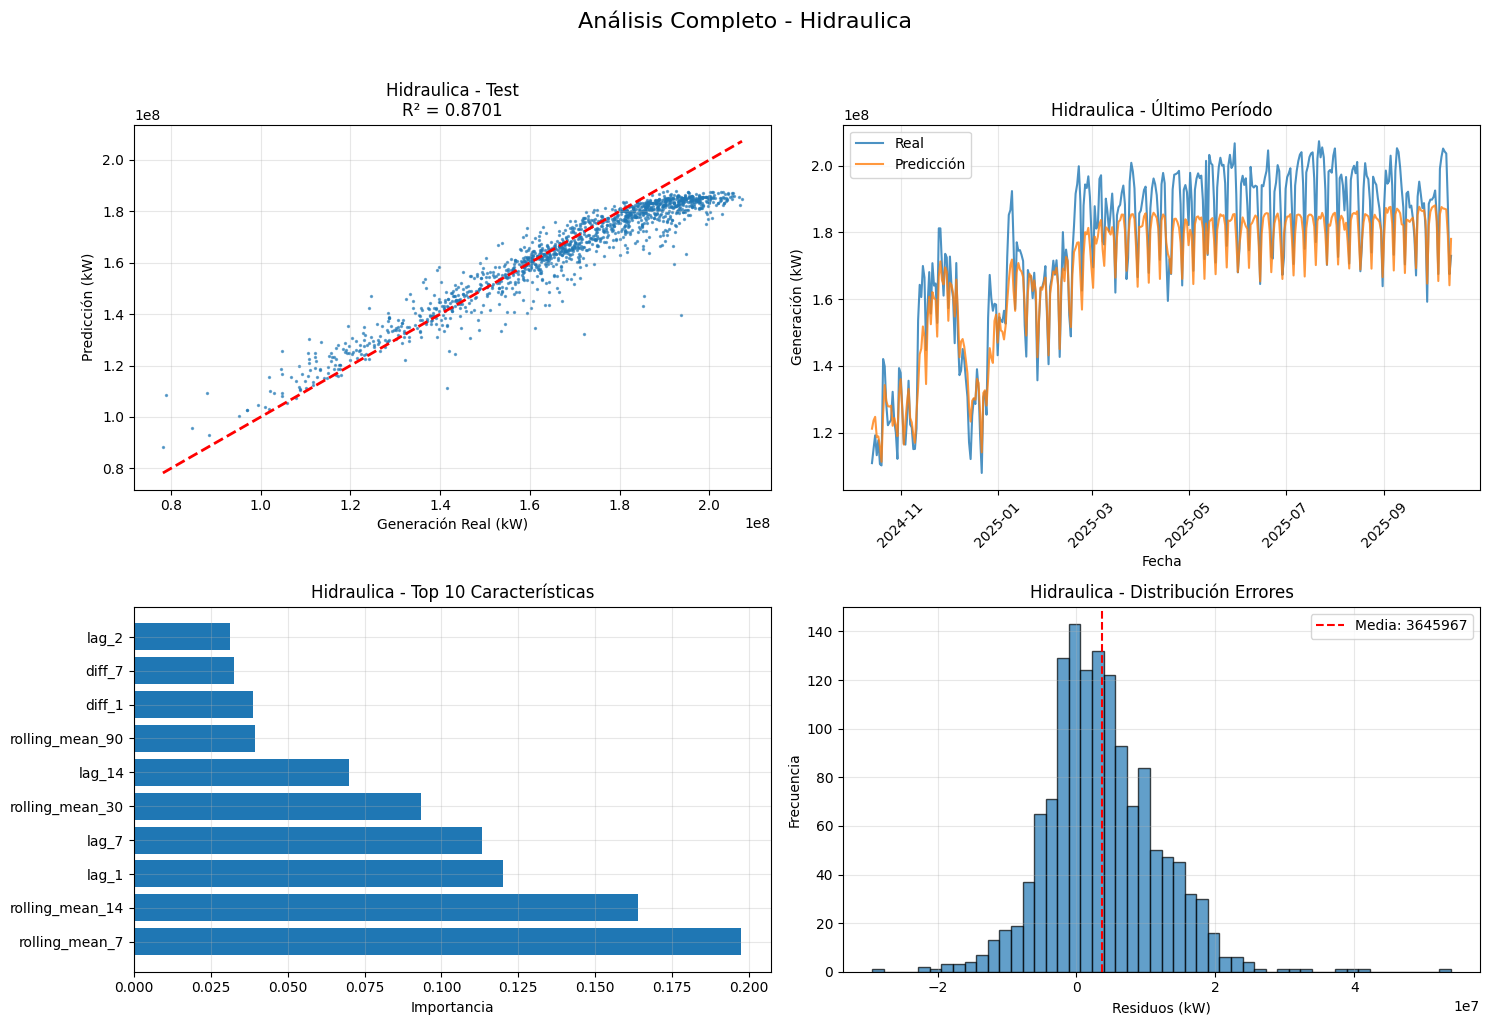

💾 Modelo guardado: random_forest_hidraulica.pkl
💾 Características guardadas: caracteristicas_hidraulica.pkl

🎉 HIDRAULICA COMPLETADO!
Modelo con MAPE test: 3.84%

PROCESANDO: TERMICA

🚀 INICIANDO ANÁLISIS COMPLETO: TERMICA
🔄 Preparando datos para Termica...
✅ Termica: 4580 días con 29 características
✅ División: 3198 entrenamiento, 1382 test
🌲 Entrenando Random Forest para Termica...
✅ Termica entrenado - OOB Score: 0.9778

🎯 RESULTADOS TERMICA:
ENTRENAMIENTO:
  MAE:  1,214,745 kW
  RMSE: 1,782,392 kW
  R²:   0.9899
  MAPE: 3.13%

TEST:
  MAE:  3,700,010 kW
  RMSE: 6,196,752 kW
  R²:   0.9358
  MAPE: 7.61%


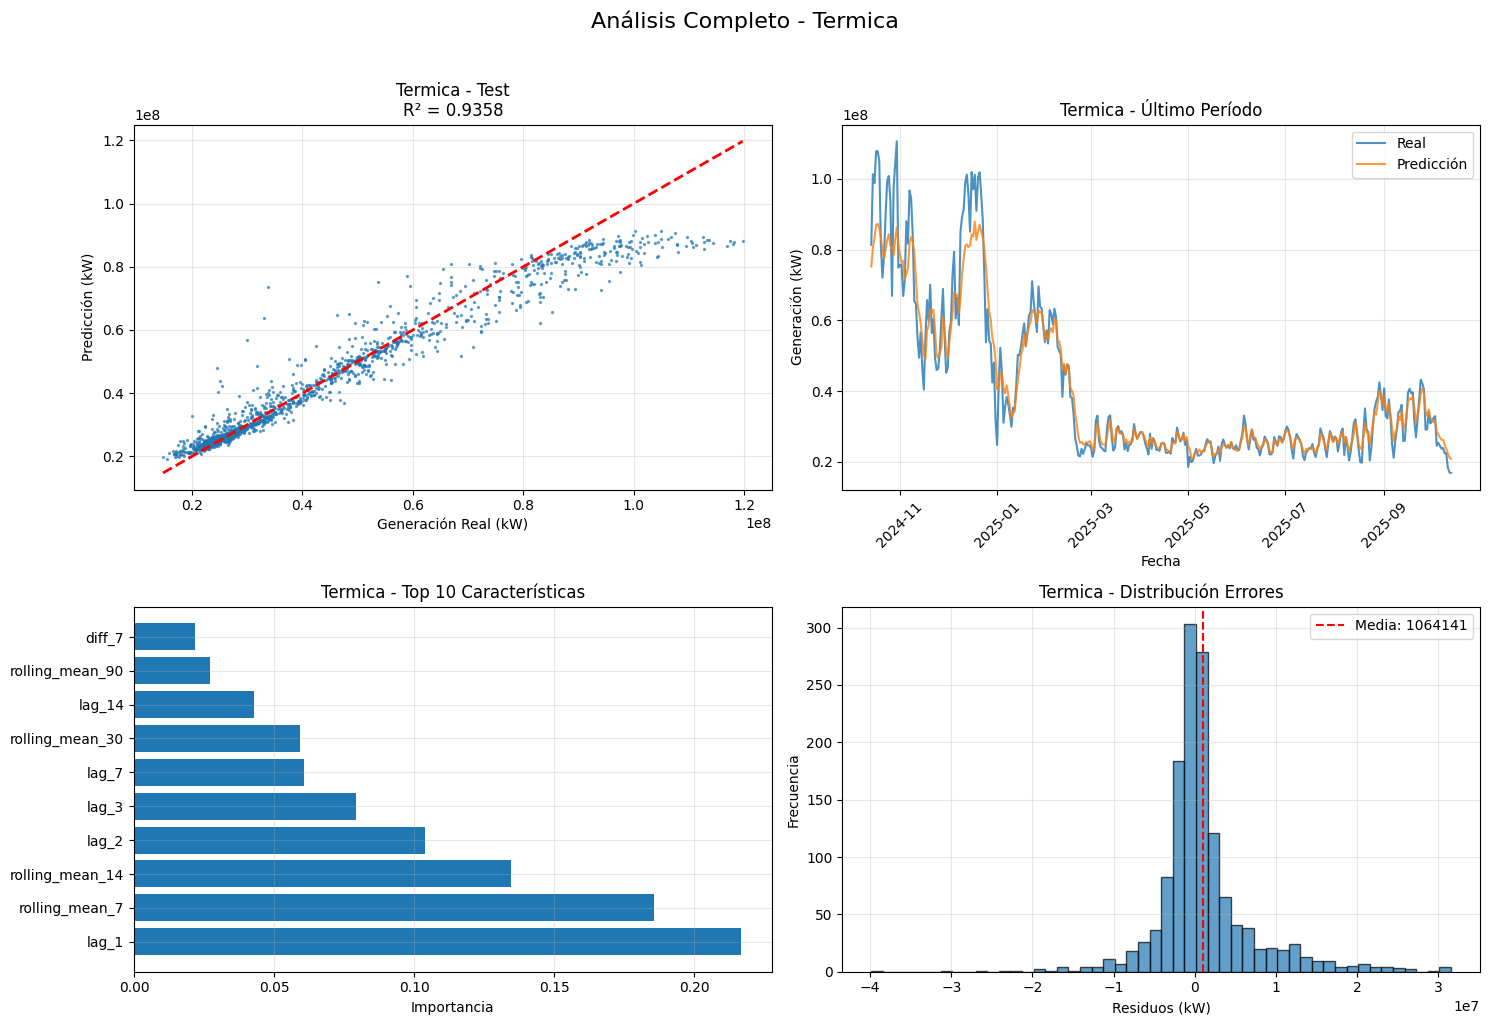

💾 Modelo guardado: random_forest_termica.pkl
💾 Características guardadas: caracteristicas_termica.pkl

🎉 TERMICA COMPLETADO!
Modelo con MAPE test: 7.61%

PROCESANDO: SOLAR

🚀 INICIANDO ANÁLISIS COMPLETO: SOLAR
🔄 Preparando datos para Solar...
✅ Solar: 2807 días con 29 características
✅ División: 1425 entrenamiento, 1382 test
🌲 Entrenando Random Forest para Solar...
✅ Solar entrenado - OOB Score: 0.9655

🎯 RESULTADOS SOLAR:
ENTRENAMIENTO:
  MAE:  25,425 kW
  RMSE: 43,107 kW
  R²:   0.9835
  MAPE: inf%

TEST:
  MAE:  4,940,331 kW
  RMSE: 6,510,891 kW
  R²:   -1.3342
  MAPE: 64.11%


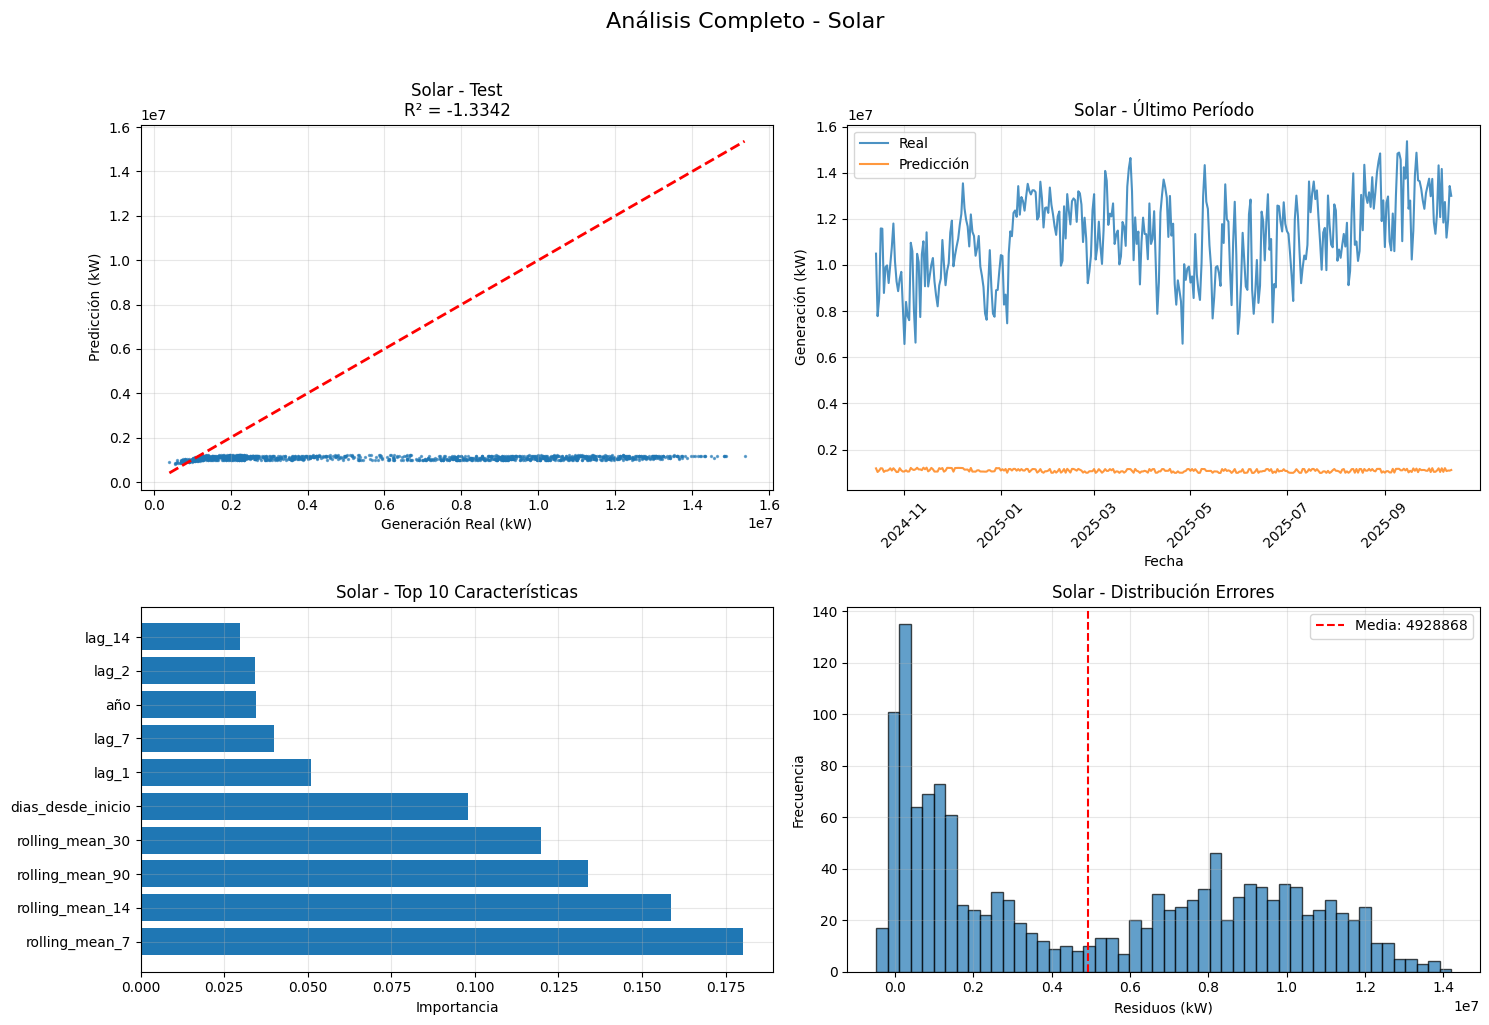

💾 Modelo guardado: random_forest_solar.pkl
💾 Características guardadas: caracteristicas_solar.pkl

🎉 SOLAR COMPLETADO!
Modelo con MAPE test: 64.11%

PROCESANDO: EOLICA

🚀 INICIANDO ANÁLISIS COMPLETO: EOLICA
🔄 Preparando datos para Eolica...
✅ Eolica: 4580 días con 29 características
✅ División: 3198 entrenamiento, 1382 test
🌲 Entrenando Random Forest para Eolica...
✅ Eolica entrenado - OOB Score: 0.9570

🎯 RESULTADOS EOLICA:
ENTRENAMIENTO:
  MAE:  8,220 kW
  RMSE: 12,761 kW
  R²:   0.9806
  MAPE: inf%

TEST:
  MAE:  197,118 kW
  RMSE: 257,103 kW
  R²:   -0.1960
  MAPE: inf%


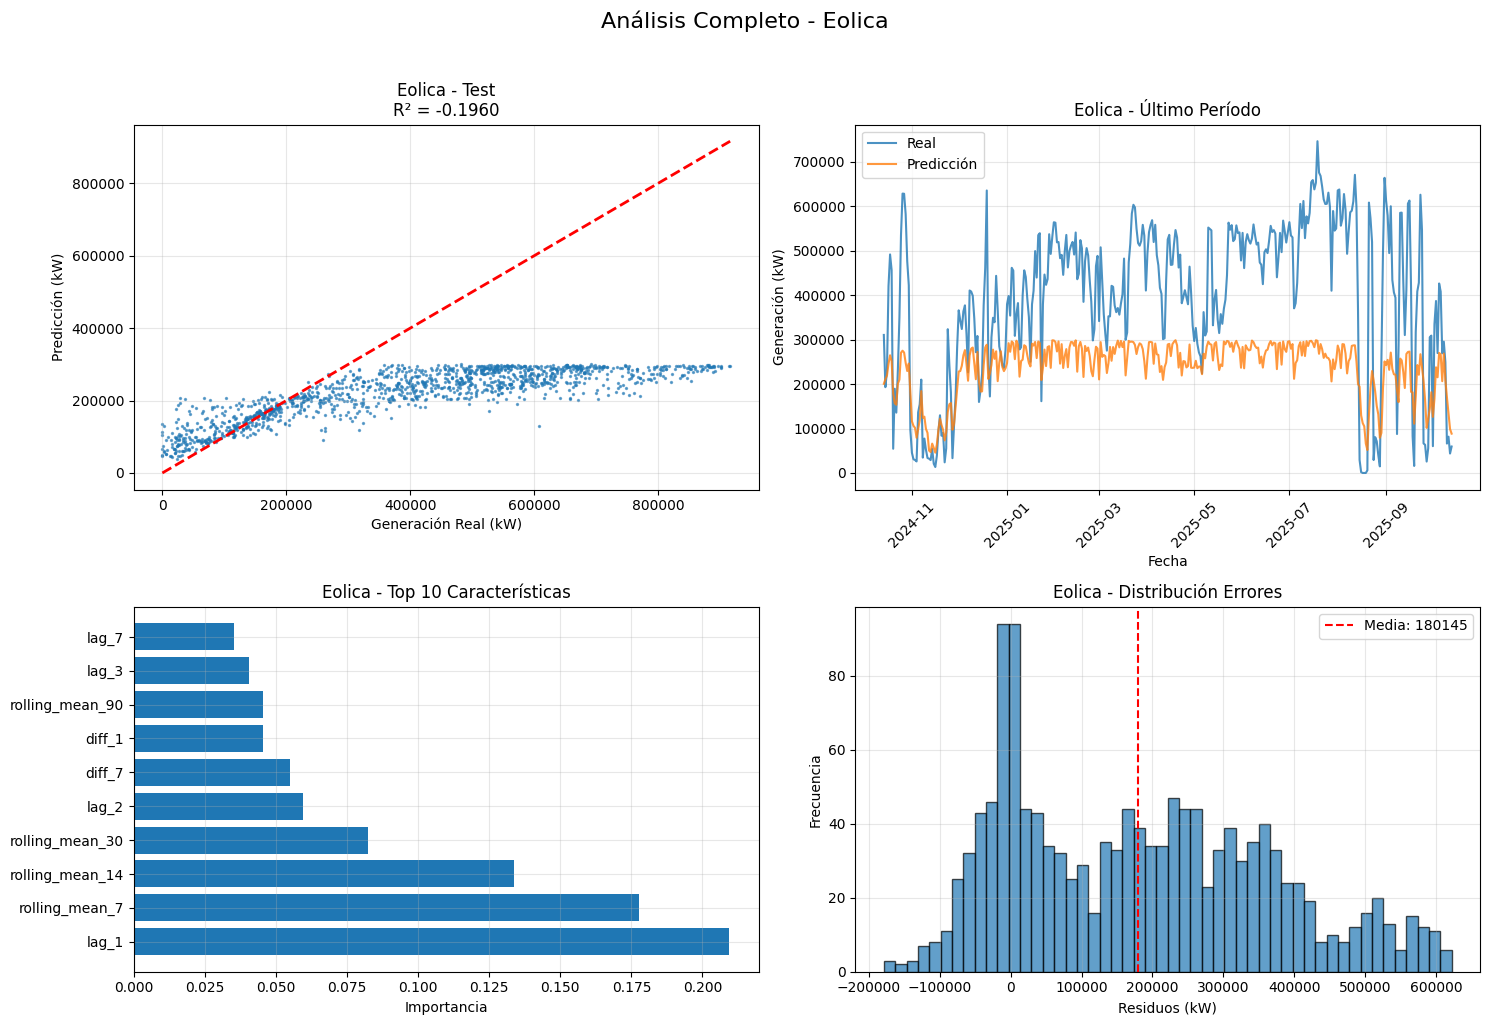

💾 Modelo guardado: random_forest_eolica.pkl
💾 Características guardadas: caracteristicas_eolica.pkl

🎉 EOLICA COMPLETADO!
Modelo con MAPE test: inf%

PROCESANDO: CONGENERADOR

🚀 INICIANDO ANÁLISIS COMPLETO: CONGENERADOR
🔄 Preparando datos para Congenerador...
✅ Congenerador: 4580 días con 29 características
✅ División: 3198 entrenamiento, 1382 test
🌲 Entrenando Random Forest para Congenerador...
✅ Congenerador entrenado - OOB Score: 0.9676

🎯 RESULTADOS CONGENERADOR:
ENTRENAMIENTO:
  MAE:  43,537 kW
  RMSE: 67,109 kW
  R²:   0.9850
  MAPE: 3.26%

TEST:
  MAE:  99,850 kW
  RMSE: 154,647 kW
  R²:   0.9285
  MAPE: 8.14%


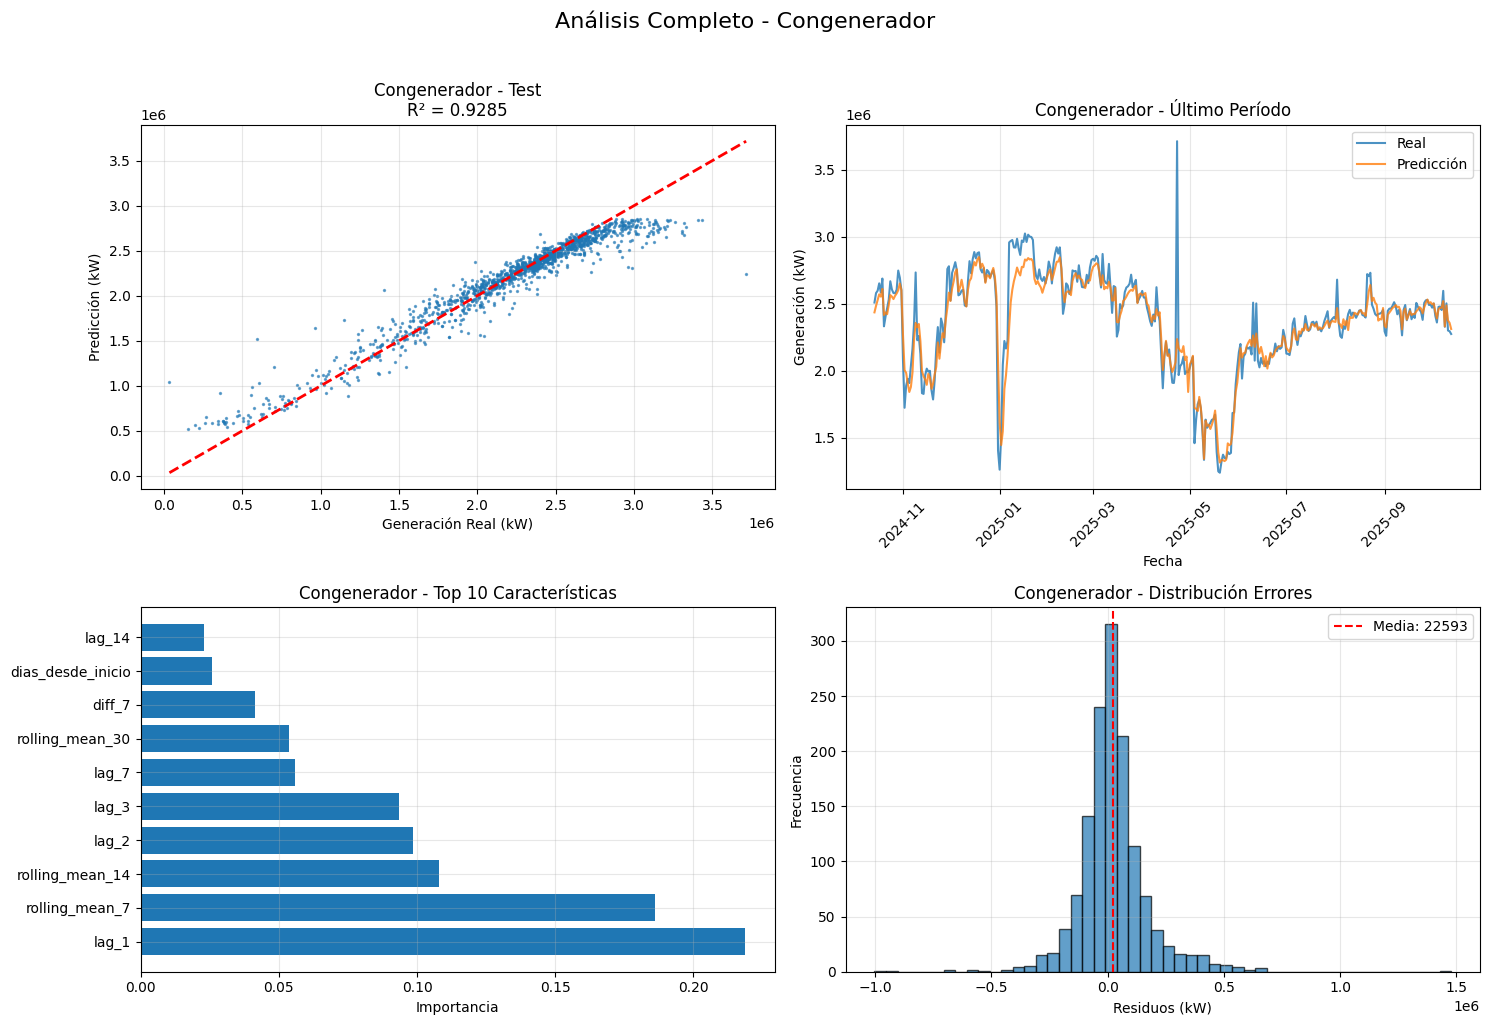

💾 Modelo guardado: random_forest_congenerador.pkl
💾 Características guardadas: caracteristicas_congenerador.pkl

🎉 CONGENERADOR COMPLETADO!
Modelo con MAPE test: 8.14%

📊 RESUMEN COMPARATIVO:
Hidraulica   | MAPE:  3.84% | R²: 0.8701
Termica      | MAPE:  7.61% | R²: 0.9358
Solar        | MAPE: 64.11% | R²: -1.3342
Eolica       | MAPE:   inf% | R²: -0.1960
Congenerador | MAPE:  8.14% | R²: 0.9285


In [130]:
# Aplicar a todos tus tipos de generación
tipos_generacion = {
    'Hidraulica': df_hidraulica,
    'Termica': df_termica, 
    'Solar': df_solar,
    'Eolica': df_eolica,
    'Congenerador': df_cogenerador
}

# Dictionary para almacenar todos los resultados
resultados_todos = {}

# Ejecutar para cada tipo
for nombre_tipo, dataframe in tipos_generacion.items():
    print(f"\n{'='*60}")
    print(f"PROCESANDO: {nombre_tipo.upper()}")
    print(f"{'='*60}")
    
    resultado = modelo_completo_energia(dataframe, nombre_tipo)
    resultados_todos[nombre_tipo] = resultado

# Comparar resultados de todos los modelos
print("\n📊 RESUMEN COMPARATIVO:")
print("="*70)
for nombre_tipo, resultado in resultados_todos.items():
    mape = resultado['metricas']['test']['MAPE']
    r2 = resultado['metricas']['test']['R2']
    print(f"{nombre_tipo:12} | MAPE: {mape:5.2f}% | R²: {r2:6.4f}")


In [145]:
df_hidraulica


,Fecha,GeneracionProgramadaRedespacho
0,2013-01-01,9.156328e+07
1,2013-01-02,1.022759e+08
2,2013-01-03,1.158264e+08
3,2013-01-04,1.173777e+08
4,2013-01-05,1.039210e+08
...,...,...
4664,2025-10-09,2.004336e+08
4665,2025-10-10,2.009774e+08
4666,2025-10-11,1.883967e+08
4667,2025-10-12,1.710628e+08
